# Test/Valid Train code repeat check

## this notbook is designed to check that is there any common code between train and test dataset.

### Data path need to be modify to fit the local path.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import time
import os,jpype
import json_lines
from tqdm import tqdm
import Levenshtein

In [40]:
##  there is a zip achievement in the root dictionary which is named  "PreprocessedDataSet.zip"
DataPath="../PreprocessedDataSet/"

In [41]:
trainset_0=pd.read_csv(DataPath+"java_code_trainset_0_count.csv")  
total_trainset=pd.DataFrame(columns=list(trainset_0.columns))
for x in range(0,16,1):
    c_trainset=pd.read_csv(DataPath+"java_code_trainset_"+str(x)+"_count.csv")  
    total_trainset=pd.concat([total_trainset,c_trainset], ignore_index=True)

In [42]:
total_trainset.head()

Unnamed: 0                                           Original  \
0          0  protected final void bindIndexed(Configuration...   
1          1  public void setServletRegistrationBeans(\n\t\t...   
2          2  public void addServletRegistrationBeans(\n\t\t...   
3          3  public void setServletNames(Collection<String>...   
4          4  public void addServletNames(String... servletN...   

                                              Parsed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Fixed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Train  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                           Train-OPT Complexity LineNumber  \
0  protected final void bindIndexed(Configuration...          4          8   
1  public void setServletRegistrationBeans(Collec...          1          4   
2  public void addServletRegistrationBeans(Servle...          1          4   
3  public void setServletNames(Collection<String>...          1          4   
4  public void addServletNames(String... servletN...          1          4   

  Methodlength LLratio StringPercentage  \
0          479  59.875              0.0   
1          292    73.0         0.140411   
2          272    68.0         0.150735   
3          190    47.5         0.152632   
4          183   45.75          0.15847   

                                               Input  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                              Output  
0    for (  ConfigurationPropertySource source : ...  
1    this.servletRegistrationBeans=new LinkedHash...  
2    Collections.addAll(this.servletRegistrationB...  
3    this.servletNames=new LinkedHashSet<>(servle...  
4    this.servletNames.addAll(Arrays.asList(servl...

In [43]:
total_trainset=total_trainset.drop(['Unnamed: 0'], axis=1)
total_trainset["Complexity"] = total_trainset["Complexity"].astype(int)
total_trainset["LineNumber"] = total_trainset["LineNumber"].astype(int)
total_trainset["Methodlength"] = total_trainset["Methodlength"].astype(int)
total_trainset["StringPercentage"] = total_trainset["StringPercentage"].astype(float)
total_trainset.head()

Original  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(\n\t\t...   
2  public void addServletRegistrationBeans(\n\t\t...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                              Parsed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Fixed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Train  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                           Train-OPT  Complexity  LineNumber  \
0  protected final void bindIndexed(Configuration...           4           8   
1  public void setServletRegistrationBeans(Collec...           1           4   
2  public void addServletRegistrationBeans(Servle...           1           4   
3  public void setServletNames(Collection<String>...           1           4   
4  public void addServletNames(String... servletN...           1           4   

   Methodlength LLratio  StringPercentage  \
0           479  59.875          0.000000   
1           292    73.0          0.140411   
2           272    68.0          0.150735   
3           190    47.5          0.152632   
4           183   45.75          0.158470   

                                               Input  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                              Output  
0    for (  ConfigurationPropertySource source : ...  
1    this.servletRegistrationBeans=new LinkedHash...  
2    Collections.addAll(this.servletRegistrationB...  
3    this.servletNames=new LinkedHashSet<>(servle...  
4    this.servletNames.addAll(Arrays.asList(servl...

In [44]:
len(total_trainset)

454451

In [45]:
total_trainset.describe()

Complexity     LineNumber   Methodlength  StringPercentage
count  454451.000000  454451.000000  454451.000000     454451.000000
mean        3.584798      13.656647     569.124392          0.033146
std        12.995630      25.858895    1202.608044          0.063663
min        -1.000000      -1.000000      -1.000000          0.000000
25%         1.000000       5.000000     217.000000          0.000000
50%         2.000000       9.000000     341.000000          0.000000
75%         4.000000      15.000000     615.000000          0.044776
max      4435.000000    7706.000000  407163.000000          1.000000

In [46]:
valid =pd.read_csv(DataPath+"java_code_valset_count.csv")  
valid =valid .drop(['Unnamed: 0'], axis=1)
valid ["Complexity"] = valid ["Complexity"].astype(int)
valid ["LineNumber"] = valid ["LineNumber"].astype(int)
valid ["Methodlength"] =valid ["Methodlength"].astype(int)
valid ["StringPercentage"] = valid ["StringPercentage"].astype(float)
valid  .head(5)

Original  \
0  @Override\n  public final String escape(String...   
1  @Override\n  protected final char[] escape(int...   
2  @Override\n  protected final int nextEscapeInd...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta\n  public long length() throws IOExcepti...   

                                              Parsed  \
0  @Override public final String escape(String s)...   
1  @Override protected final char[] escape(int cp...   
2  @Override protected final int nextEscapeIndex(...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta public long length() throws IOException ...   

                                               Fixed  \
0  @Override public final String escape(String s)...   
1  @Override protected final char[] escape(int cp...   
2  @Override protected final int nextEscapeIndex(...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta public long length() throws IOException ...   

                                               Train  \
0  @Override public final String escape(String s)...   
1  @Override protected final char[] escape(int cp...   
2  @Override protected final int nextEscapeIndex(...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta public long length() throws IOException ...   

                                           Train-OPT  Complexity  LineNumber  \
0  @Override public final String escape(String s)...           6          10   
1  @Override protected final char[] escape(int cp...           5          12   
2  @Override protected final int nextEscapeIndex(...           6          10   
3  public BufferedReader openBufferedStream() thr...           2           4   
4  @Beta public long length() throws IOException ...           2          17   

   Methodlength    LLratio  StringPercentage  \
0           304  30.400000               0.0   
1           285  23.750000               0.0   
2           315  31.500000               0.0   
3           200  50.000000               0.0   
4           421  24.764706               0.0   

                                               Input  \
0  @Override public final String escape(String s)...   
1  @Override protected final char[] escape(int cp...   
2  @Override protected final int nextEscapeIndex(...   
3  public BufferedReader openBufferedStream() thr...   
4  @Beta public long length() throws IOException ...   

                                              Output  
0                                        return s;\n  
1                   char[] chars=replacements[cp];\n  
2      if ((c < replacementsLength && replacement...  
3                      Reader reader=openStream();\n  
4                  return countBySkipping(reader);\n

In [47]:
len(valid)

15328

In [48]:
valid .describe()

Complexity    LineNumber  Methodlength       LLratio  \
count  15328.000000  15328.000000  15328.000000  15328.000000   
mean       2.977427     11.584747    486.681302     46.658699   
std        4.182533     13.978350    617.794176     27.645854   
min       -1.000000     -1.000000     -1.000000      1.000000   
25%        1.000000      4.000000    196.000000     33.292017   
50%        2.000000      8.000000    299.000000     42.000000   
75%        3.000000     13.000000    535.000000     54.000000   
max      187.000000    293.000000  17644.000000   1833.600000   

       StringPercentage  
count      15328.000000  
mean           0.032154  
std            0.064936  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.040359  
max            1.000000

In [49]:
#Train /  Test
test=pd.read_csv(DataPath+"java_code_testset_count.csv")  
test=test.drop(['Unnamed: 0'], axis=1)
test["Complexity"] = test["Complexity"].astype(int)
test["LineNumber"] = test["LineNumber"].astype(int)
test["Methodlength"] =test["Methodlength"].astype(int)
test["StringPercentage"] = test["StringPercentage"].astype(float)
test .head(5)

Original  \
0  protected final void fastPathOrderedEmit(U val...   
1  @CheckReturnValue\n    @NonNull\n    @Schedule...   
2  @SuppressWarnings("unchecked")\n    @CheckRetu...   
3  @SuppressWarnings({ "unchecked", "rawtypes" })...   
4  @SuppressWarnings({ "unchecked", "rawtypes" })...   

                                              Parsed  \
0  protected final void fastPathOrderedEmit(U val...   
1  @CheckReturnValue @NonNull @SchedulerSupport(S...   
2  @SuppressWarnings("unchecked") @CheckReturnVal...   
3  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
4  @SuppressWarnings({"unchecked","rawtypes"}) @C...   

                                               Fixed  \
0  protected final void fastPathOrderedEmit(U val...   
1  @CheckReturnValue @NonNull @SchedulerSupport(S...   
2  @SuppressWarnings("unchecked") @CheckReturnVal...   
3  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
4  @SuppressWarnings({"unchecked","rawtypes"}) @C...   

                                               Train  \
0  protected final void fastPathOrderedEmit(U val...   
1  @CheckReturnValue @NonNull @SchedulerSupport(S...   
2  @SuppressWarnings("unchecked") @CheckReturnVal...   
3  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
4  @SuppressWarnings({"unchecked","rawtypes"}) @C...   

                                           Train-OPT  Complexity  LineNumber  \
0  protected final void fastPathOrderedEmit(U val...           6          22   
1  @CheckReturnValue @NonNull @SchedulerSupport(S...           1           4   
2  @SuppressWarnings("unchecked") @CheckReturnVal...           3          11   
3  @SuppressWarnings({"unchecked","rawtypes"}) @C...           1           4   
4  @SuppressWarnings({"unchecked","rawtypes"}) @C...           1           5   

   Methodlength    LLratio  StringPercentage  \
0           565  25.681818          0.000000   
1           301  75.250000          0.049834   
2           468  42.545455          0.051282   
3           380  95.000000          0.084211   
4           473  94.600000          0.084567   

                                               Input  \
0  protected final void fastPathOrderedEmit(U val...   
1  @CheckReturnValue @NonNull @SchedulerSupport(S...   
2  @SuppressWarnings("unchecked") @CheckReturnVal...   
3  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
4  @SuppressWarnings({"unchecked","rawtypes"}) @C...   

                                              Output  
0                          accept(observer,value);\n  
1    return RxJavaPlugins.onAssembly(new Observab...  
2                                  if (len == 1) {\n  
3    ObjectHelper.requireNonNull(sources,"sources...  
4    ObjectHelper.requireNonNull(sources,"sources...

In [50]:
len(test)

26909

In [51]:
test.describe()

Complexity    LineNumber  Methodlength       LLratio  \
count  26909.000000  26909.000000  26909.000000  26909.000000   
mean       3.599391     13.649634    554.497937     44.805000   
std        6.316198     18.924394    803.779312     18.995273   
min       -1.000000     -1.000000     -1.000000      1.000000   
25%        1.000000      5.000000    214.000000     32.300000   
50%        2.000000      9.000000    338.000000     40.571429   
75%        4.000000     16.000000    602.000000     52.250000   
max      534.000000    564.000000  29396.000000    523.333333   

       StringPercentage  
count      26909.000000  
mean           0.034766  
std            0.068013  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.046429  
max            1.000000

In [52]:
len(test)+len(valid)

42237

In [53]:
similarity_threshold=0.7

In [54]:
# Check 
def checkSimilarity(df1,df2):
    repeatTrain=[]
    repeatValuation=[]
    repeatSimilarity=[]
    total_similarity=[]
    if(len(df1["Fixed"])>0 and  len(df2["Fixed"])> 0 ):
        for x in tqdm(list(df1["Fixed"])):
            for y in list(df2["Fixed"]):
                score=round(Levenshtein.ratio(x,y),4)
                if(score>similarity_threshold):
                    repeatTrain.append(x)
                    repeatValuation.append(y)
                    repeatSimilarity.append(score)
                    #print(total_trainset["Fixed"][x])
                    #print(valuation["Fixed"][y])
                    #print(score)
    return repeatTrain,repeatValuation,repeatSimilarity

# Train / valuation

In [55]:
max_com=max(valid["Complexity"])+1
max_ln=max(valid["LineNumber"])+1
print(max_com,max_ln)
total_repeatCode=pd.DataFrame(columns=["Train","Valid","Similarity"])
total_repeatTrain=[]
total_repeatValuation=[]
total_repeatSimilarity=[]
for x in range(max_com):
    for y in range(max_ln):
        d1=total_trainset[ (total_trainset["Complexity"]==x ) & (total_trainset["LineNumber"]==y )]
        d2=valid[ (valuation["Complexity"]<=x+1) & (valid["LineNumber"]<=y+1) &(valid["Complexity"]>=x-1) & (valid["LineNumber"]>=y-1) ]
        repeatTrain,repeatValuation,repeatSimilarity=checkSimilarity(d1,d2)
        total_repeatTrain+=repeatTrain
        total_repeatValuation+=repeatValuation
        total_repeatSimilarity+=repeatSimilarity
result={"Train":total_repeatTrain,"valid":total_repeatValuation,"Similarity":total_repeatSimilarity}
total_repeatCode_valid=pd.DataFrame(result)
total_repeatCode_valid.to_csv("Train_valid_repeat.csv")

188 294


100%|██████████| 25/25 [00:00<00:00, 737.19it/s]


100%|██████████| 705/705 [00:03<00:00, 220.38it/s]


100%|██████████| 64/64 [00:00<00:00, 703.29it/s]


100%|██████████| 47/47 [00:00<00:00, 840.95it/s]


100%|██████████| 22/22 [00:00<00:00, 912.56it/s]


100%|██████████| 20/20 [00:00<00:00, 1091.83it/s]


100%|██████████| 9/9 [00:00<00:00, 1802.97it/s]


100%|██████████| 7/7 [00:00<00:00, 7015.56it/s]


100%|██████████| 12/12 [00:00<00:00, 1503.96it/s]


100%|██████████| 3/3 [00:00<00:00, 1002.62it/s]


100%|██████████| 2/2 [00:00<00:00, 177.35it/s]


100%|██████████| 1/1 [00:00<00:00, 334.29it/s]


In [59]:
total_repeatCode_valid=pd.read_csv("Train_valid_repeat.csv")

In [60]:
total_repeatCode_valid.head(100000)

Unnamed: 0                                              Train  \
0               0  public static Result evaluate(String goldFile,...   
1               1  public static Http2Exception connectionError(H...   
2               2  public HttpHeaders add(CharSequence name,Objec...   
3               3  public HttpHeaders add(CharSequence name,Objec...   
4               4  public HttpHeaders add(CharSequence name,Objec...   
...           ...                                                ...   
24648       24648  public static long powExact(long b,int k){\n  ...   
24649       24649  private final void step1(){\n  if (sb.charAt(k...   
24650       24650  private void visitImplicitFirstFrame(){\n  int...   
24651       24651  private void visitImplicitFirstFrame(){\n  int...   
24652       24652  private final void step5(){\n  if (k == 0)   r...   

                                                   valid  Similarity  
0      public T put(String id,File feedFile) throws E...      0.7364  
1      public static Sql createf(String fmt,Object......      0.7040  
2      public AddressBuilderQuery query(CharSequence ...      0.7273  
3      public AddressBuilderQuery queryDecoded(CharSe...      0.7005  
4      public AddressBuilderQuery queryEncoded(CharSe...      0.7170  
...                                                  ...         ...  
24648  @GwtIncompatible public static long checkedPow...      0.9233  
24649  private void step1(){\n  if (b[k] == 's') {\n ...      0.9481  
24650  private void visitImplicitFirstFrame(){\n  int...      0.9546  
24651  private void getImplicitFrame(final Context fr...      0.7086  
24652  private void step5(){\n  if (k == k0)   return...      0.9885  

[24653 rows x 4 columns]

In [61]:
print(total_repeatCode_valid["Train"][2])

public HttpHeaders add(CharSequence name,Object value){
  return add(name.toString(),value);
}



In [64]:
print(total_repeatCode_valid["valid"][2])

public AddressBuilderQuery query(CharSequence name,Object value){
  return parent.query(name,value);
}



In [65]:
len(valid)

15328

In [66]:
uniqueValues_valid= total_repeatCode_valid['valid'].unique()

# 0.7

In [67]:
total_repeatCode_valid.head(5)

Unnamed: 0                                              Train  \
0           0  public static Result evaluate(String goldFile,...   
1           1  public static Http2Exception connectionError(H...   
2           2  public HttpHeaders add(CharSequence name,Objec...   
3           3  public HttpHeaders add(CharSequence name,Objec...   
4           4  public HttpHeaders add(CharSequence name,Objec...   

                                               valid  Similarity  
0  public T put(String id,File feedFile) throws E...      0.7364  
1  public static Sql createf(String fmt,Object......      0.7040  
2  public AddressBuilderQuery query(CharSequence ...      0.7273  
3  public AddressBuilderQuery queryDecoded(CharSe...      0.7005  
4  public AddressBuilderQuery queryEncoded(CharSe...      0.7170

In [68]:
len(uniqueValues_valid)

2081

In [69]:
len(uniqueValues_valid)/len(valid)

0.13576461377870563

# 0.8

In [70]:
df_valid_08=total_repeatCode_valid[total_repeatCode_valid["Similarity"]>=0.8]
df_valid_08.head(5)

Unnamed: 0                                              Train  \
12           12  static List<HpackHeader> headers(HpackHeadersS...   
92           92  @Override public Set<V> get(Object key){\n  re...   
93           93  @Override public Set<V> get(Object key){\n  re...   
189         189  @Override public V poll(long timeout,TimeUnit ...   
192         192  @Override public V poll(long timeout,TimeUnit ...   

                                                 valid  Similarity  
12   protected static List<Header> headers(HeadersS...      0.9286  
92   @Override public SortedSet<V> get(@Nullable K ...      0.8521  
93   @Override public SortedSet<V> get(@NullableDec...      0.8439  
189  @Override public boolean await(long time,TimeU...      0.8279  
192  @Override public boolean await(long time,TimeU...      0.8145

In [71]:
print(df_valid_08["Train"][189])

@Override public V poll(long timeout,TimeUnit unit) throws InterruptedException {
  return get(pollAsync(timeout,unit));
}



In [73]:
print(df_valid_08["valid"][189])

@Override public boolean await(long time,TimeUnit unit) throws InterruptedException {
  return _task.await(time,unit);
}



In [74]:
lenghth_08=len(total_repeatCode_valid[total_repeatCode_valid["Similarity"]>=0.8]['valid'].unique())

In [75]:
print(lenghth_08)

682


In [76]:
lenghth_08/len(valid)

0.0444937369519833

# 0.9

In [77]:
df_valid_09=total_repeatCode_valid[total_repeatCode_valid["Similarity"]>=0.9]
df_valid_09.head(5)

Unnamed: 0                                              Train  \
12           12  static List<HpackHeader> headers(HpackHeadersS...   
448         448  public static <T1,T2,T3>Tuple3<T1,T2,T3> tuple...   
508         508  @Deprecated public static JsonObject readFrom(...   
532         532  public static Set<Field> getFieldsAnnotatedWit...   
775         775  public static <S>ServiceLoader<S> load(Class<S...   

                                                 valid  Similarity  
12   protected static List<Header> headers(HeadersS...      0.9286  
448  public static <T1,T2,T3>Tuple3<T1,T2,T3> of(T1...      0.9055  
508  @Deprecated public static JsonObject readFrom(...      0.9010  
532  public static Field getFieldAnnotatedWith(Obje...      0.9602  
775  public static <S>ServiceFinder<S> load(Class<S...      0.9520

In [78]:
print(df_valid_09["Train"][12])

static List<HpackHeader> headers(HpackHeadersSize size,boolean limitToAscii){
  return headersMap.get(new HeadersKey(size,limitToAscii));
}



In [80]:
print(df_valid_09["valid"][12])

protected static List<Header> headers(HeadersSize size,boolean limitToAscii){
  return headersMap.get(new HeadersKey(size,limitToAscii));
}



In [81]:
lenghth_09=len(total_repeatCode_valid[total_repeatCode_valid["Similarity"]>=0.9]['valid'].unique())

In [82]:
print(lenghth_09)

222


In [83]:
lenghth_09/len(valid)

0.01448329853862213

# 1.0

In [84]:
df_valid_1=total_repeatCode_valid[total_repeatCode_valid["Similarity"]>=1]
df_valid_1.head(5)

Empty DataFrame
Columns: [Unnamed: 0, Train, valid, Similarity]
Index: []

# Train / Test

In [69]:
max_com=max(test["Complexity"])+1
max_ln=max(test["LineNumber"])+1
print(max_com,max_ln)
total_repeatCode=pd.DataFrame(columns=["Train","Test","Similarity"])
total_repeatTrain=[]
total_repeatValuation=[]
total_repeatSimilarity=[]
for x in range(max_com):
    for y in range(max_ln):
        d1=total_trainset[ (total_trainset["Complexity"]==x ) & (total_trainset["LineNumber"]==y )]
        d2=test[ (test["Complexity"]<=x+1) & (test["LineNumber"]<=y+1) &(test["Complexity"]>=x-1) & (test["LineNumber"]>=y-1) ]
        repeatTrain,repeatValuation,repeatSimilarity=checkSimilarity(d1,d2)
        total_repeatTrain+=repeatTrain
        total_repeatValuation+=repeatValuation
        total_repeatSimilarity+=repeatSimilarity
result={"Train":total_repeatTrain,"Test":total_repeatValuation,"Similarity":total_repeatSimilarity}
total_repeatCode_Test=pd.DataFrame(result)
total_repeatCode_Test.to_csv("Train_Test_repeat.csv")

535 565


100%|██████████| 393/393 [00:02<00:00, 184.74it/s]


100%|██████████| 127/127 [00:00<00:00, 239.07it/s]


100%|██████████| 41/41 [00:00<00:00, 1080.52it/s]


100%|██████████| 2/2 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 905.96it/s]


100%|██████████| 3/3 [00:00<00:00, 1504.23it/s]


100%|██████████| 3/3 [00:00<00:00, 1232.53it/s]


100%|██████████| 1/1 [00:00<00:00, 482.05it/s]


100%|██████████| 1/1 [00:00<?, ?it/s]


In [37]:
total_repeatCode_Test=pd.read_csv("RepeatCode/Train_Test_repeat.csv")

In [38]:
total_repeatCode_Test.head(100000)

Unnamed: 0                                              Train  \
0               0  protected Connection createConnection(Socket s...   
1               1  @Deprecated public static String getHeader(Htt...   
2               2  @SuppressWarnings("UnusedParameters") protecte...   
3               3  public String encode(String name,String value)...   
4               4  public String encode(String name,String value)...   
...           ...                                                ...   
99995       99995  public String getGoID(){\n  if (GOMention_Type...   
99996       99996  public String getGoID(){\n  if (GOMention_Type...   
99997       99997  public String getGoID(){\n  if (GOMention_Type...   
99998       99998  public String getGoID(){\n  if (GOMention_Type...   
99999       99999  public String getGoID(){\n  if (GOMention_Type...   

                                                    Test  Similarity  
0      public static long copy(InputStream inputStrea...      0.7251  
1      public static String get(String name,String de...      0.7080  
2      protected ByteBuf extractFrame(ChannelHandlerC...      0.7963  
3      public Attribute addGlobalAttribute(String nam...      0.7032  
4      public HttpBuilder param(String name,String va...      0.7027  
...                                                  ...         ...  
99995  public void setQuery(String v){\n  if (Search_...      0.7504  
99996  public FSArray getHitList(){\n  if (Search_Typ...      0.7080  
99997  public String getSearchId(){\n  if (Search_Typ...      0.7917  
99998  public void setSearchId(String v){\n  if (Sear...      0.7452  
99999  public void setDocId(String v){\n  if (Passage...      0.7663  

[100000 rows x 4 columns]

In [39]:
uniqueValues_Test =total_repeatCode_Test['Test'].unique()

In [40]:
len(test)

26909

# 0.7

In [41]:
total_repeatCode_Test.head(5)

Unnamed: 0                                              Train  \
0           0  protected Connection createConnection(Socket s...   
1           1  @Deprecated public static String getHeader(Htt...   
2           2  @SuppressWarnings("UnusedParameters") protecte...   
3           3  public String encode(String name,String value)...   
4           4  public String encode(String name,String value)...   

                                                Test  Similarity  
0  public static long copy(InputStream inputStrea...      0.7251  
1  public static String get(String name,String de...      0.7080  
2  protected ByteBuf extractFrame(ChannelHandlerC...      0.7963  
3  public Attribute addGlobalAttribute(String nam...      0.7032  
4  public HttpBuilder param(String name,String va...      0.7027

In [42]:
len(uniqueValues_Test )

4072

In [43]:
len(uniqueValues_Test )/len(test)

0.15132483555687687

# 0.8

In [44]:
df_Test_08=total_repeatCode_Test[total_repeatCode_Test["Similarity"]>=0.8]
df_Test_08.head(5)

Unnamed: 0                                              Train  \
6            6  protected ByteBuf extractFrame(ChannelHandlerC...   
12          12  public Router<T> addConnect(String path,T targ...   
13          13  public Router<T> addConnect(String path,T targ...   
15          15  @SuppressWarnings("unchecked") public static <...   
20          20  @Override public void writeFixed(byte[] bytes,...   

                                                 Test  Similarity  
6   protected ByteBuf extractFrame(ChannelHandlerC...      0.9333  
12  public Router<T> CONNECT_FIRST(String path,T t...      0.8796  
13  public Router<T> CONNECT_LAST(String path,T ta...      0.8879  
15  @SuppressWarnings("unchecked") public static <...      0.8430  
20  @Override public void writePrimitiveArray(Obje...      0.8047

In [45]:
lenghth_test_08=len(total_repeatCode_Test[total_repeatCode_Test["Similarity"]>=0.8]['Test'].unique())

In [46]:
print(lenghth_test_08)

1576


In [47]:
lenghth_test_08/len(test)

0.058567765431639975

# 0.9

In [48]:
df_Test_09=total_repeatCode_Test[total_repeatCode_Test["Similarity"]>=0.9]
df_Test_09.head(5)

Unnamed: 0                                              Train  \
6             6  protected ByteBuf extractFrame(ChannelHandlerC...   
338         338  @Override public INDArray convn(INDArray input...   
342         342  public static INDArray convn(INDArray input,IN...   
352         352  @Override public void save(INDArray save,Strin...   
388         388  public SDVariable lstmCell(String baseName,LST...   

                                                  Test  Similarity  
6    protected ByteBuf extractFrame(ChannelHandlerC...      0.9333  
338  @Override public IComplexNDArray convn(IComple...      0.9325  
342  public static IComplexNDArray convn(IComplexND...      0.9333  
352  @Override public void save(IComplexNDArray sav...      0.9238  
388  public SDVariable lstm(String baseName,LSTMCel...      0.9737

In [49]:
lenghth_test_09=len(total_repeatCode_Test[total_repeatCode_Test["Similarity"]>=0.9]['Test'].unique())

In [50]:
print(lenghth_test_09)

488


In [51]:
lenghth_test_09/len(test)

0.01813519640269055

# 1

In [54]:
df_Test_1=total_repeatCode_Test[total_repeatCode_Test["Similarity"]>=1]
df_Test_1.head(5)

Unnamed: 0                                              Train  \
59917       59917  public void putAll(Map<? extends K,? extends V...   

                                                    Test  Similarity  
59917  public void putAll(Map<? extends K,? extends V...         1.0

In [55]:
print(df_Test_1["Train"][59917])

public void putAll(Map<? extends K,? extends V> m){
  for (  Map.Entry<? extends K,? extends V> e : m.entrySet())   put(e.getKey(),e.getValue());
}



In [56]:
print(df_Test_1["Test"][59917])

public void putAll(Map<? extends K,? extends V> m){
  for (  Map.Entry<? extends K,? extends V> e : m.entrySet())   put(e.getKey(),e.getValue());
}



# Visualization

In [15]:
len(test)+len(valid)

42237

In [58]:
print(lenghth_test_08+lenghth_08)

2258


In [59]:
print(lenghth_test_09+lenghth_09)

710


In [60]:
print(len(df_Test_1)+len(df_valid_1))

1


# 0.8

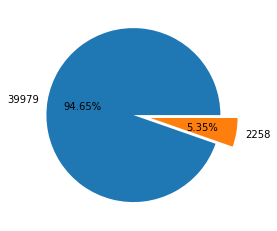

In [61]:
y = np.array([42237-2258,2258])
plt.pie(y,labels=[str(y[0]),str(y[1])],explode=(0, 0.2,), autopct='%.2f%%',)
plt.title("0.8")
plt.show()

# 0.9

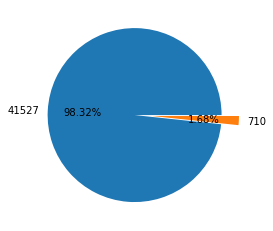

In [62]:
y = np.array([42237-710,710])
plt.pie(y,labels=[str(y[0]),str(y[1])],explode=(0, 0.2,), autopct='%.2f%%',)
plt.show()

# 1.0

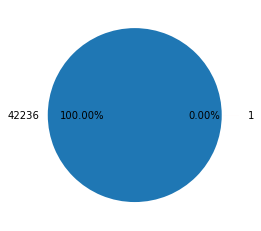

In [63]:
y = np.array([42237-1,1])
plt.pie(y,labels=[str(y[0]),str(y[1])],explode=(0, 0.2,), autopct='%.2f%%',)
plt.show()